## How to have multiple X/Y axis in the same plot


For more info see:

https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py


In [1]:
import numpy as np
from astropy.io import fits           # To read some data
from astropy.time import Time         # To convert MJD to calendar dates
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def some_data(path_to_data):
    """
    Grabbing some data for plotting. In this case, light curve of 
    an X-ray source from the BAT telescope in form of a fits file.
    
    """
    data = fits.open(path_to_data)[1].data
    x = data['TIME']
    y = data['RATE']
    dy = data['ERROR']
    return x, y, dy


def plot_mkr(x, y, dy, xlim_low, xlim_high, ylim_low, ylim_high, y2_coeff):
    """
    Making a plot with two x and two y axes. In this case, a light curve,
    with x-axes being MJD (bottom) and equivalent calendar date (top),
    and with y-axes being observed count rate (left) and equivalent flux (right).
    
    xlim_low, xlim_high: limit on the x axis (bottom axis)
    
    ylim_low, ylim_high: limit on the y axis (left axis)
    
    y2_coeff: Conversion coeficient for the 2nd y-axis
    
    The 2nd X-axis does not need a coefficient as it's known in this case 
    (for converting MJD to calendar dates), and we use astropy.time to apply
    the conversion.
    
    """
    plt.figure(figsize=(12,6))
    plt.errorbar(x, y, dy, fmt='o', capsize=3, ms=2, alpha=0.8, markeredgewidth=0.5)
    plt.xlabel('MJD',fontsize=14)
    plt.ylabel('Count rate\n15-50 keV\n(Ct s$^{-1}$)',fontsize=12)
    plt.xlim(xlim_low,xlim_high)
    plt.ylim(ylim_low,ylim_high)
    plt.yscale('log')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='major', length=9)
    plt.tick_params(axis='both', which='minor', length=4.5)
    plt.tick_params(axis='both', which='both',direction='in')
    # 2nd x-axis:
    plt2 = plt.twiny()
    plt2.set_xticks(np.arange(0,1,1.0/5.001))
    plt2.set_xticklabels(Time(Time((plt2.get_xticks()*(xlim_high-xlim_low))+xlim_low,format='mjd',scale='utc').isot,out_subfmt='date_hms').value,rotation=45,ha='left')
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.tick_params(axis='both', which='major', length=9)
    plt.tick_params(axis='both', which='minor', length=4.5)
    plt.tick_params(axis='both', which='both',direction='in')
    plt.minorticks_on()
    # 2nd y-axis:
    plt3 = plt.twinx()
    plt.ylim(ylim_low*y2_coeff,ylim_high*y2_coeff)
    plt.yscale('log')
    plt.ylabel('Flux \n (erg s$^{-1}$ cm$^{-2}$)',rotation=270,va='bottom',fontsize=12)
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='major', length=9)
    plt.tick_params(axis='both', which='minor', length=4.5)
    plt.tick_params(axis='both', which='both',direction='in')
    plt.show()


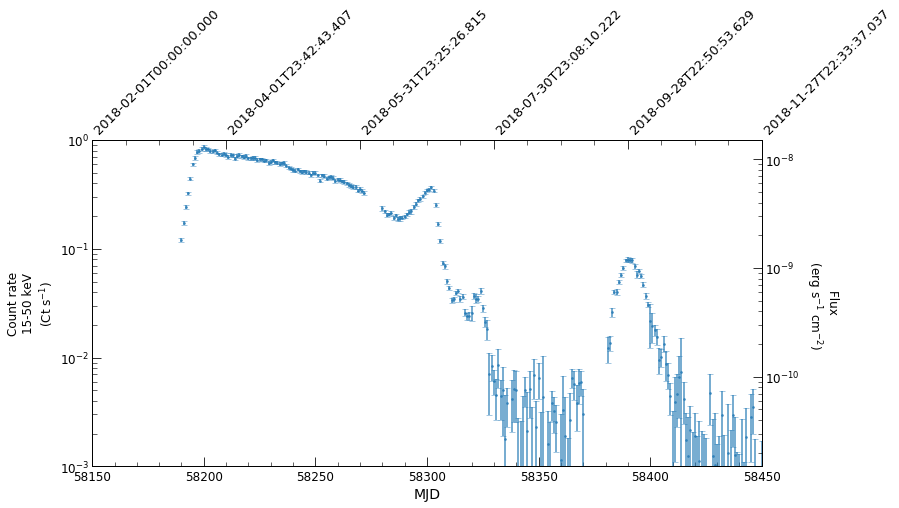

In [19]:
x, y, dy = some_data('https://swift.gsfc.nasa.gov/results/transients/weak/MAXIJ1820p070.lc.fits')
plot_mkr(x, y, dy, 58150, 58450, 1e-3, 1, 1.5e-8)

In [37]:
aaa = Time(Time([56300.323,56300.451],format='mjd',scale='utc').isot,out_subfmt='date_hms')

In [43]:
aaa.to_datetime()

array([datetime.datetime(2013, 1, 8, 7, 45, 7, 200000),
       datetime.datetime(2013, 1, 8, 10, 49, 26, 400000)], dtype=object)